In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
warnings.filterwarnings('ignore')

In [3]:
import io
URL= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
print('DatasSet is downloaded')

DatasSet is downloaded


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [6]:
df.tail()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia
527,12/31/2023,2023,Dec,0,95.92,0.34,25240.425,2319,3,13.518,-1.064211,2.1,3538.5,Smallfamiliycar,Georgia


In [7]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

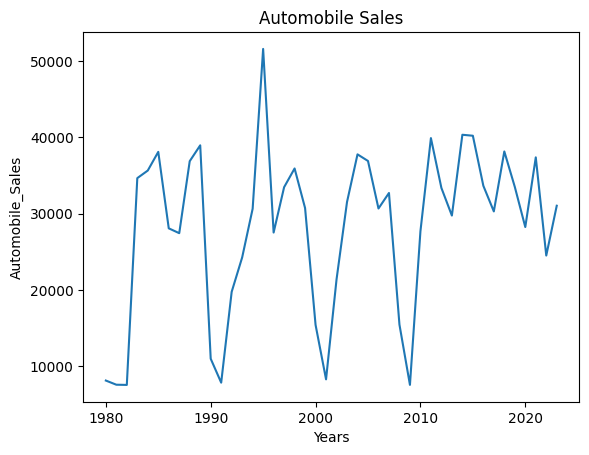

In [10]:
data=df.groupby('Year')['Automobile_Sales'].sum()
data.plot(x='Years',y='Automobile_Sales',kind='line')
plt.title('Automobile Sales')
plt.xlabel('Years')
plt.ylabel('Automobile_Sales')
plt.show()

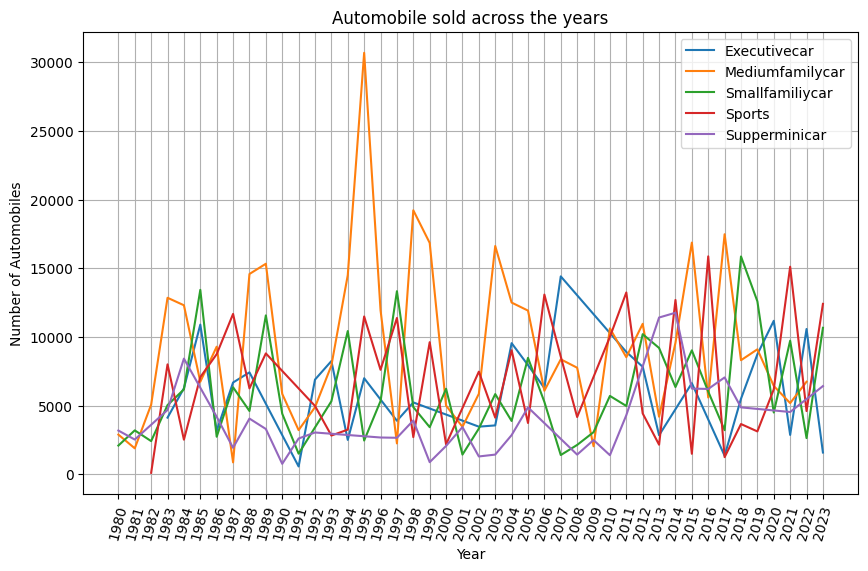

In [16]:
plt.figure(figsize=(10, 6))
data = df.groupby(["Year", "Vehicle_Type"])[["Automobile_Sales"]].sum().reset_index()
data.set_index("Year", inplace=True)
data= data.groupby(["Vehicle_Type"])["Automobile_Sales"]
data.plot(kind="line")
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max()+1)), rotation=75)
plt.grid()
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")
plt.legend()

Text(0.5, 1.0, 'Average Automobile Sales during Recession and Non-Recession')

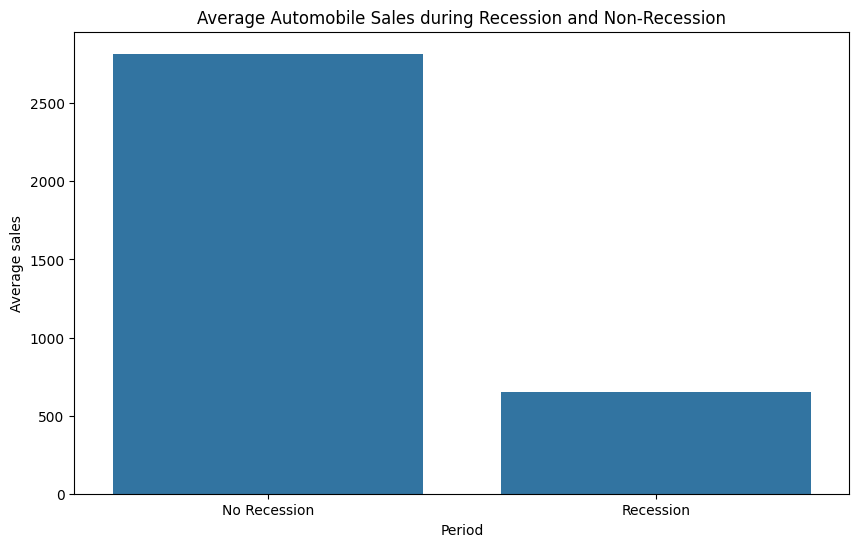

In [20]:
data=df.groupby(["Recession"])["Automobile_Sales"].mean().reset_index()
data["Recession"] = data["Recession"].replace({0:"No Recession", 1:"Recession"})
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Recession", y="Automobile_Sales")
plt.xlabel('Period')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')

Text(0.5, 1.0, 'Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

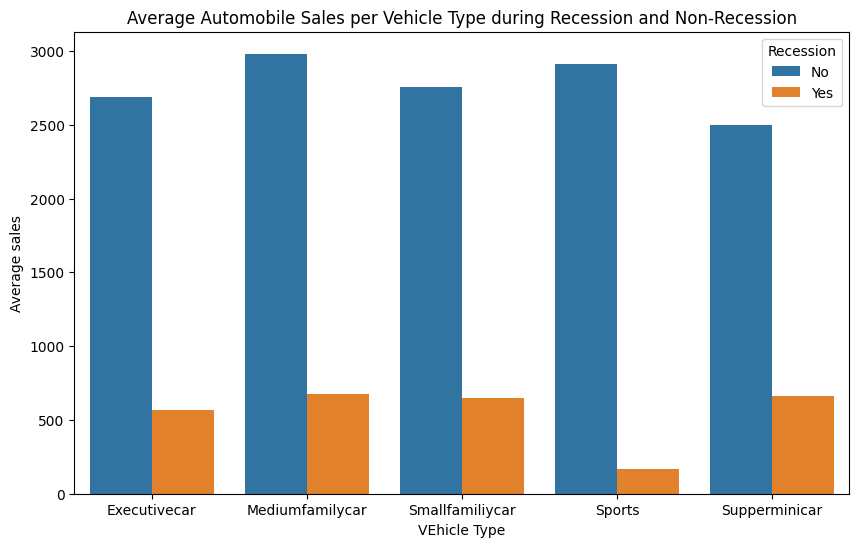

In [21]:
temp=df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No", 1:"Yes"})
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.xlabel('VEhicle Type')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

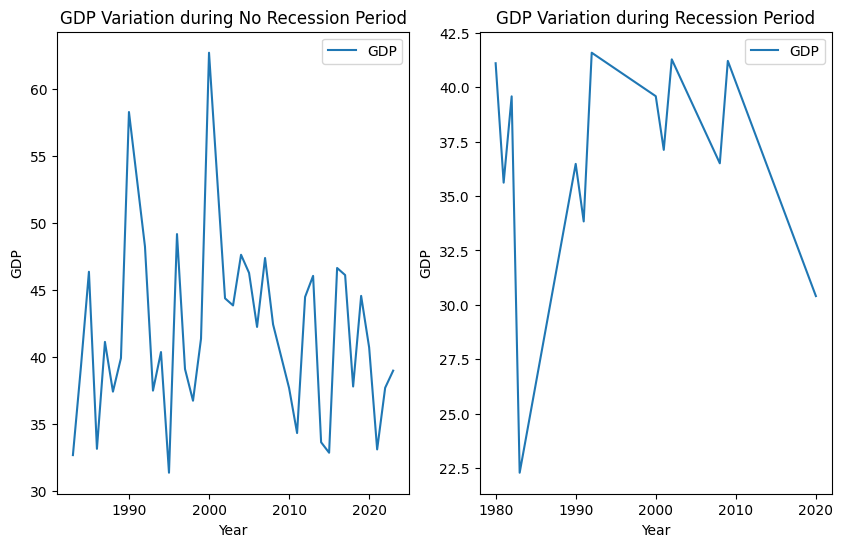

In [22]:
data = df.groupby(["Recession","Year"])["GDP"].mean().reset_index()
no = data[data["Recession"] == 0]
yes = data[data["Recession"] == 1]
fig = plt.figure(figsize=(10, 6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
no.plot(x="Year", y="GDP", kind="line", ax=ax0)
ax0.set_title('GDP Variation during No Recession Period')
ax0.set_ylabel('GDP')
yes.plot(x="Year", y="GDP", kind="line", ax=ax1)
ax1.set_title('GDP Variation during Recession Period')
ax1.set_ylabel('GDP')
plt.show()

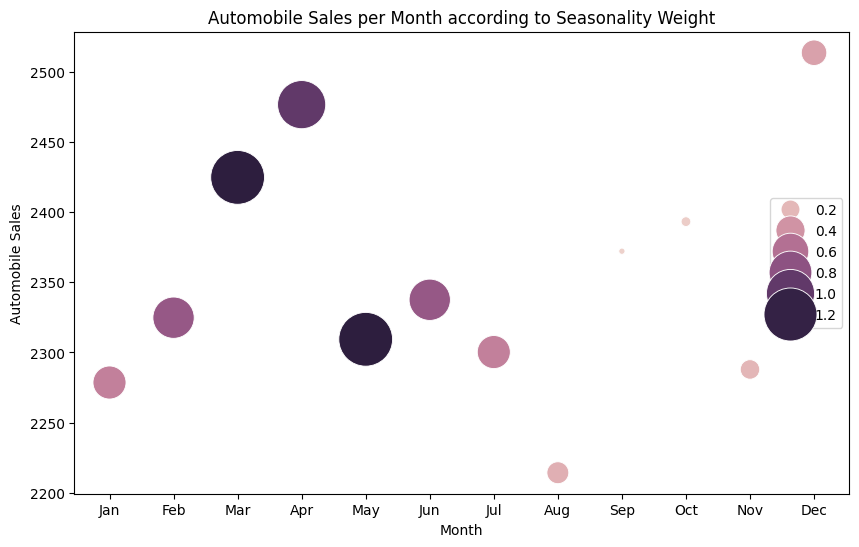

In [24]:
data = df.copy()
months=data["Month"].unique().tolist()
data["Month"] = data["Month"].replace(dict(zip(months, range(0,len(months)))))
data = data.groupby("Month")[["Automobile_Sales", "Seasonality_Weight"]].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.xticks(ticks=range(0,len(months)),labels=months)
sns.scatterplot(data=data,
                x='Month',
                y='Automobile_Sales',
                hue="Seasonality_Weight",
                size="Seasonality_Weight",
                sizes=(20, 1500)
               )
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales per Month according to Seasonality Weight")
plt.legend(loc="right")

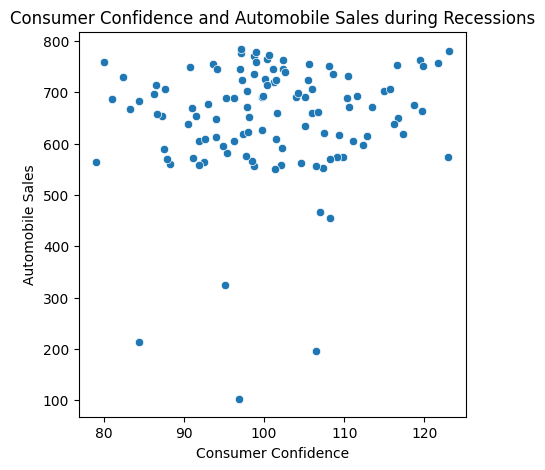

In [25]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df[df["Recession"]==1], x='Consumer_Confidence', y='Automobile_Sales')
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.show()

No Recession    0.790129
Recession       0.209871
Name: Advertising_Expenditure, dtype: float64

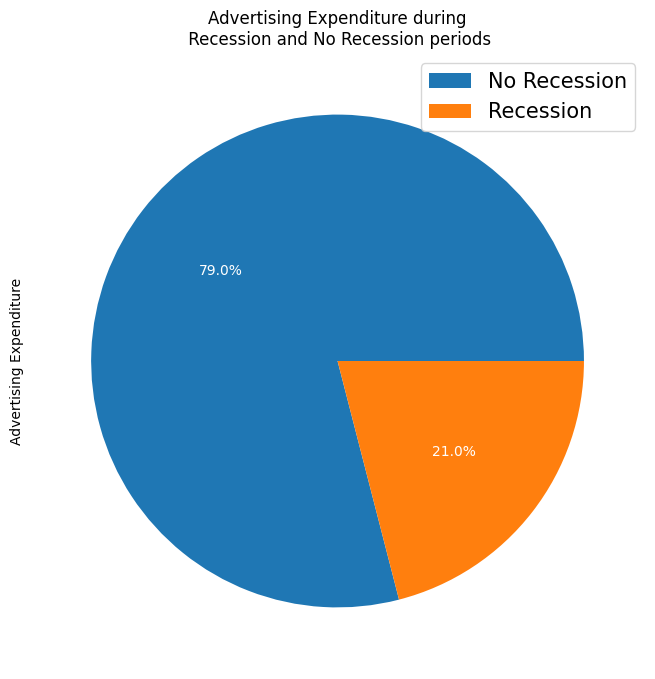

In [28]:
data=df.groupby("Recession")["Advertising_Expenditure"].sum()/df["Advertising_Expenditure"].sum()
data.index=["No Recession", "Recession"]
display(data)
data.plot(kind="pie",
          figsize=(12, 8),
          y="Advertising_Expenditure",
          ylabel=dict(ylabel="Advertising Expenditure",fontsize=50),
          x="Recession",
          autopct='%1.1f%%',
          textprops={'color':"w", "size":10},
         )
plt.ylabel(ylabel="Advertising Expenditure")
plt.title(label="Advertising Expenditure during\n Recession and No Recession periods")
plt.legend(fontsize=15)
plt.show()

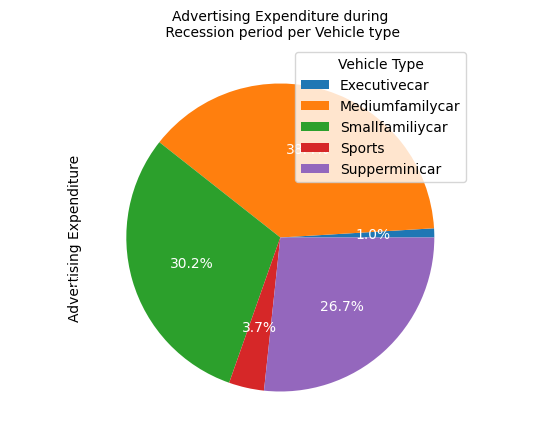

In [32]:
data=df[df["Recession"]==1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
data.plot(kind="pie",
          figsize=(10, 5),
          autopct='%1.1f%%',
          y="Advertising_Expenditure",
          textprops={'color':"w", "size":10},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=10)
plt.title(label="Advertising Expenditure during\n Recession period per Vehicle type",fontsize=10)
plt.legend(title="Vehicle Type", loc="best", fontsize=10)
plt.show()

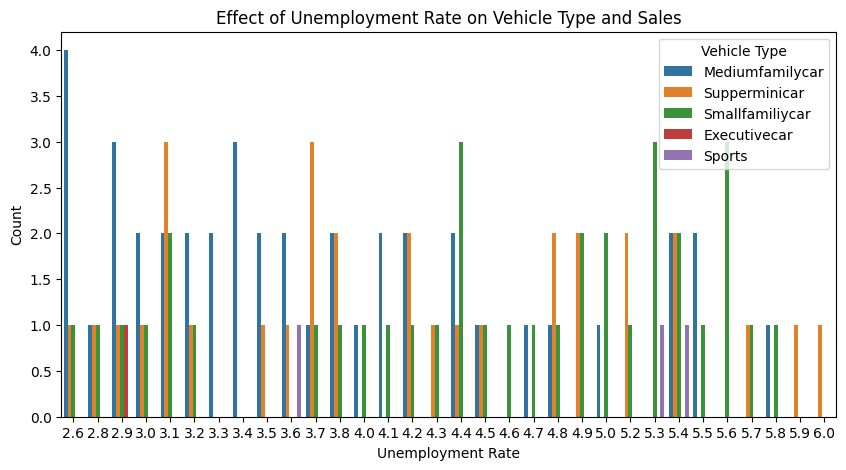

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df["Recession"]==1], x="unemployment_rate", hue="Vehicle_Type")
plt.xlabel("Unemployment Rate")
plt.ylabel("Count")
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.legend(loc="upper right", title="Vehicle Type")